In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
info = pd.read_csv(r'C:\Users\NKAZIMULO BUTHELEZI\Documents\Recruitment-Data-218\info.csv',index_col = 'id')
logic_and_interview = pd.read_csv(r'C:\Users\NKAZIMULO BUTHELEZI\Documents\Recruitment-Data-218\logic_and_interview.csv',index_col = 'id')
matric_results = pd.read_csv(r'C:\Users\NKAZIMULO BUTHELEZI\Documents\Recruitment-Data-218\matric_results.csv',index_col = 'id')
personalities = pd.read_csv(r'C:\Users\NKAZIMULO BUTHELEZI\Documents\Recruitment-Data-218\personalities.csv',index_col = 'id')
scores = pd.read_csv(r'C:\Users\NKAZIMULO BUTHELEZI\Documents\Recruitment-Data-218\scores.csv',index_col = 'id')

In [3]:
table1 = pd.merge(info, logic_and_interview, left_index = True, right_index = True)
table2 = pd.merge(matric_results, personalities,left_index = True, right_index = True)
table3 = pd.merge(table2, scores,left_index = True, right_index = True)
df = pd.merge(table1, table3,left_index = True, right_index = True)

In [4]:
df.head()

,age,qualification,programming,Sex,Interviewer,Aptitude Score,Logic Test Score %,Interview Score,English,Afrikaans,...,Science,Computer Applications,Province,I/E,N/S,T/F,J/P,A/T,type,score
id,,,,,,,,,,,,,,,,,,,,,
1,27,Graduate,A little,Male,Dewald Botha,0.80,0.89,8.0,A,D,...,C,NaN,KZN,I,S,T,J,A,ISTJ-A,687
2,34,Graduate,None,Male,Dewald Botha,0.77,0.80,8.0,C,A,...,C,NaN,CT,I,N,F,J,T,INFJ-T,599
3,26,Graduate,A lot,Male,John Clur,0.87,0.75,10.0,B,E,...,C,NaN,JHB,E,N,F,J,A,ENFJ-A,804
4,23,Post Graduate,A little,Male,Byron Roelofsz,0.73,0.90,8.0,A,A,...,A,NaN,PTA,I,N,F,J,T,INFJ-T,792
5,28,Matriculant,None,Female,Dewald Botha,0.75,0.61,6.0,A,A,...,B,NaN,PTA,I,N,F,J,A,INFJ-A,488


In [5]:
df.to_csv('Orginal.csv')

In [6]:
df = pd.get_dummies(df)

In [7]:
df.columns

Index(['age', 'Aptitude Score', 'Logic Test Score %', 'Interview Score',
       'score', 'qualification_Graduate', 'qualification_Matriculant',
       'qualification_Post Graduate', 'programming_A little',
       'programming_A lot',
       ...
       'type_INTJ-T', 'type_INTP-A', 'type_INTP-T', 'type_ISFJ-A',
       'type_ISFJ-T', 'type_ISFP-A', 'type_ISTJ-A', 'type_ISTJ-T',
       'type_ISTP-A', 'type_ISTP-T'],
      dtype='object', length=107)

In [8]:
#Dependent variable
y = df['score']

In [9]:
#independent variable
X = df.drop('score', axis = 1)

In [10]:
df.head()

,age,Aptitude Score,Logic Test Score %,Interview Score,score,qualification_Graduate,qualification_Matriculant,qualification_Post Graduate,programming_A little,programming_A lot,...,type_INTJ-T,type_INTP-A,type_INTP-T,type_ISFJ-A,type_ISFJ-T,type_ISFP-A,type_ISTJ-A,type_ISTJ-T,type_ISTP-A,type_ISTP-T
id,,,,,,,,,,,,,,,,,,,,,
1,27,0.80,0.89,8.0,687,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,34,0.77,0.80,8.0,599,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,0.87,0.75,10.0,804,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,23,0.73,0.90,8.0,792,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,28,0.75,0.61,6.0,488,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.columns

Index(['age', 'Aptitude Score', 'Logic Test Score %', 'Interview Score',
       'score', 'qualification_Graduate', 'qualification_Matriculant',
       'qualification_Post Graduate', 'programming_A little',
       'programming_A lot',
       ...
       'type_INTJ-T', 'type_INTP-A', 'type_INTP-T', 'type_ISFJ-A',
       'type_ISFJ-T', 'type_ISFP-A', 'type_ISTJ-A', 'type_ISTJ-T',
       'type_ISTP-A', 'type_ISTP-T'],
      dtype='object', length=107)

In [12]:
len(list(X))

106

In [13]:
df.to_csv('converted_data.csv')

# Single Factor Analyis

In [14]:
#import the api module from the statsmodels library, which we'll use to perform thes tests
import statsmodels.api as sm

feature_names = ['age',
 'Aptitude Score',
 'Logic Test Score %',
 'Interview Score',
 'qualification_Graduate',
 'qualification_Matriculant',
 'qualification_Post Graduate',
 'programming_A little',
 'programming_A lot',
 'programming_Ninja level',
 'programming_None',
 'Sex_Female',
 'Sex_Male',
 'Interviewer _Aidan Helmbold',
 'Interviewer _Byron Roelofsz',
 'Interviewer _Dewald Botha',
 'Interviewer _John Clur',
 'Interviewer _Nuri Barnard',
 'Interviewer _Shaun Dippnall',
 'English _A',
 'English _B',
 'English _C',
 'English _D',
 'English _E',
 'Afrikaans_A',
 'Afrikaans_B',
 'Afrikaans_C',
 'Afrikaans_D',
 'Afrikaans_E',
 'Afrikaans_F',
 'Sepedi _A',
 'Sepedi _B',
 'Sepedi _C',
 'Zulu_A',
 'Zulu_B',
 'Zulu_C',
 'Sotho_A',
 'Sotho_B',
 'Sotho_C',
 'Swana_B',
 'Swana_C',
 'Venda_A',
 'Venda_B',
 'Venda_C',
 'Xhosa_A',
 'Xhosa_B',
 'Xhosa_C',
 'Maths_A',
 'Maths_B',
 'Maths_C',
 'Maths_D',
 'Maths_E',
 'Maths_F',
 'Maths_G',
 'Science_A',
 'Science_B',
 'Science_C',
 'Science_D',
 'Science_E',
 'Science_F',
 'Computer Applications_A',
 'Computer Applications_C',
 'Province_CT',
 'Province_DBN',
 'Province_EC',
 'Province_JHB',
 'Province_KZN',
 'Province_NC',
 'Province_NW',
 'Province_PTA',
 'I/E_E',
 'I/E_I',
 'N/S_N',
 'N/S_S',
 'T/F_F',
 'T/F_T',
 'J/P_J',
 'J/P_P',
 'A/T_A',
 'A/T_T',
 'type_ENFJ-A',
 'type_ENFP-A',
 'type_ENFP-T',
 'type_ENTJ-A',
 'type_ENTP-A',
 'type_ENTP-T',
 'type_ESFJ-A',
 'type_ESFP-A',
 'type_ESFP-T',
 'type_ESTJ-A',
 'type_ESTP-A',
 'type_INFJ-A',
 'type_INFJ-T',
 'type_INFP-A',
 'type_INFP-T',
 'type_INTJ-A',
 'type_INTJ-T',
 'type_INTP-A',
 'type_INTP-T',
 'type_ISFJ-A',
 'type_ISFJ-T',
 'type_ISFP-A',
 'type_ISTJ-A',
 'type_ISTJ-T',
 'type_ISTP-A',
 'type_ISTP-T']

# Create a empty list g, which will be appended with information of each feature
g = []

# Create a for loop to do the following for all features:
# 1) fit the regression line
# 2) calculate parameters, test statistic and p-value
# 3) add 2) to a list
for column in X:
    regression = sm.OLS(y, sm.add_constant(X[[column]])).fit()
    regression_params = regression.params[1]
    regression_tvalues = regression.tvalues[1]
    regression_pvalues = regression.pvalues[1]
    regression_intercept = regression.params[0]
    g.append([regression_params, regression_tvalues, regression_pvalues, regression_intercept])
    
# Create dataframe with coefficient, t statistc and p-value per feature and sort by p-value
g = pd.DataFrame(data= np.array(g).reshape((len(feature_names), 4)), index=feature_names, columns=['Coefficient', 't_statistic', 'p_value','Intercept'])
g.sort_values(by = 'p_value') 

,Coefficient,t_statistic,p_value,Intercept
Logic Test Score %,266.052500,3.831127,0.000229,404.906992
Science_A,89.458824,3.348708,0.001165,600.541176
Aptitude Score,244.837295,3.308086,0.001328,445.043164
qualification_Matriculant,-54.707753,-3.044191,0.003018,634.732143
qualification_Post Graduate,72.581756,2.858033,0.005238,601.132530
Interview Score,22.924892,2.847645,0.005398,423.718669
Xhosa_C,-89.957143,-2.589664,0.011118,618.100000
Maths_F,-126.521277,-2.427039,0.017108,615.521277
programming_None,-38.632075,-2.116114,0.036950,629.132075
Afrikaans_B,57.791176,2.092530,0.039057,604.458824


In [15]:
SFA = g.sort_values(by = 'p_value').head(11)
SFA.to_csv('Single Factor Analysis.csv')

In [16]:
#This means there are 4 features that have a significant impact on the score at 5% significance level
#That is Logic Test Score%, Science_A, Aptitude Score, Qualification_Matriculant

In [17]:
g.to_csv('all columns SFA.csv')

In [18]:
len(feature_names)

106

In [19]:
y = df['score']

In [20]:
X = df[['Logic Test Score %','Science_A','Aptitude Score','qualification_Matriculant','qualification_Post Graduate','Interview Score','Xhosa_C','Maths_F','programming_None','Afrikaans_B','Maths_A']]

In [21]:
X.columns

Index(['Logic Test Score %', 'Science_A', 'Aptitude Score',
       'qualification_Matriculant', 'qualification_Post Graduate',
       'Interview Score', 'Xhosa_C', 'Maths_F', 'programming_None',
       'Afrikaans_B', 'Maths_A'],
      dtype='object')

# BUILDING MACHINE LEARNING MODEL

# split our data


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X.head()

,Logic Test Score %,Science_A,Aptitude Score,qualification_Matriculant,qualification_Post Graduate,Interview Score,Xhosa_C,Maths_F,programming_None,Afrikaans_B,Maths_A
id,,,,,,,,,,,
1,0.89,0,0.80,0,0,8.0,0,0,0,0,0
2,0.80,0,0.77,0,0,8.0,0,0,1,0,0
3,0.75,0,0.87,0,0,10.0,0,0,0,0,1
4,0.90,1,0.73,0,1,8.0,0,0,0,0,1
5,0.61,0,0.75,1,0,6.0,0,0,1,0,1


In [24]:
df[['Science_A','Maths_A', 'Maths_F']].head()

,Science_A,Maths_A,Maths_F
id,,,
1,0,0,0
2,0,0,0
3,0,1,0
4,1,1,0
5,0,1,0


# Matric Results

In [25]:
#LOGIC TEST MODEL
y_matric = df['score']
X_matric = df[['Science_A','Maths_A', 'Maths_F']]

#Train/test data
X_matric_train, X_matric_test, y_matric_train, y_matric_test = train_test_split(X_matric, y_matric, test_size = 0.2,random_state = 100)

#train
from sklearn.linear_model import LinearRegression
lm_matric = LinearRegression()

In [26]:
lm_matric.fit(X_matric, y_matric)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
lm_matric.intercept_

603.3497314293201

In [28]:
lm_matric.coef_

array([  81.61718852,    5.49063278, -114.34973143])

# PAST PERFORMANCE MODEL

In [29]:
#APTITUDE TEST MODEL
y_past = df['score']
X_past = df[['Logic Test Score %','Aptitude Score', 'Interview Score']]

#train/test data
X_past_train, X_past_test, y_past_train, y_past_test = train_test_split(X_past, y_past, test_size = 0.2, random_state = 100)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lm_past = LinearRegression()

In [32]:
lm_past.fit(X_past, y_past)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
lm_past.intercept_

140.08221523407178

In [34]:
lm_past.coef_

array([206.64686447, 182.11001525,  22.82696902])

# INFO

In [35]:
#INFORMATION  MODEL 
y_info = df['score']
X_info = df[['qualification_Matriculant','qualification_Post Graduate','programming_None']]
#Train and test data split
X_info_train, X_info_test, y_info_train, y_info_test = train_test_split(X_info, y_info, test_size = 0.2, random_state = 100)

In [36]:
lm_info = LinearRegression()

In [37]:
lm_info.fit(X_info_train, y_info_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
lm_info.intercept_

633.7419446460693

In [39]:
lm_info.coef_

array([-36.89665715,  54.36584798, -34.28026083])

# FULL MODEL

In [40]:
#FULL MODEL
y_all = df['score']
X_all = df[['Logic Test Score %','Aptitude Score', 'Interview Score','Science_A','Maths_A', 'Maths_F','qualification_Matriculant','qualification_Post Graduate','programming_None']]

In [41]:
#FULL MODEL
X_train_all, X_test_all, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=100)

In [42]:
#After splitting the data, now we train the model
from sklearn.linear_model import LinearRegression
lm_all = LinearRegression()   #creatig the instance of the Linear Regression object so we'll apply methods on it.

In [43]:
#now we train the model by fitting the train data
lm_all.fit(X_train_all, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
lm_all.intercept_    #or alpha in the formula,this is the expected score if all the feature values are zero

250.74646859797394

In [45]:
lm_all.coef_ #the sign of the coefficients tell us about the proportionality between the label and the score, if the coef IS -VE there is an inverse prop. relationship
#the coeff is the value the score will increase by if the feature increases by 1

array([178.00832578, 131.06287947,  17.28407104,  33.65913286,
         8.45296755, -49.65624739, -29.86025033,  41.46136506,
       -19.26837516])

In [46]:
#No we look at how good the model fits to the training and tetsing data, we look at the mean square error and R square for the data to assess the goodness of fit.
#The average of squared error(MSE)(for actual vs predicted)`

In [47]:
X_all.columns


Index(['Logic Test Score %', 'Aptitude Score', 'Interview Score', 'Science_A',
       'Maths_A', 'Maths_F', 'qualification_Matriculant',
       'qualification_Post Graduate', 'programming_None'],
      dtype='object')

In [48]:
#Since there are many features we should put them into a df so we'll know which coefficient corresponds with which feature name
coeff_df = pd.DataFrame(lm_all.coef_,X_all.columns.values, columns = ['Coefficient'])
coeff_df

,Coefficient
Logic Test Score %,178.008326
Aptitude Score,131.062879
Interview Score,17.284071
Science_A,33.659133
Maths_A,8.452968
Maths_F,-49.656247
qualification_Matriculant,-29.860250
qualification_Post Graduate,41.461365
programming_None,-19.268375


# Now that we have estimated all the parameters, let's look at how good the fit is to both the training and testing data. We will look at the mean squared error (MSE) and R squared for the data to assess the goodness of fit.

In [49]:
#PREDICT(Trainig data)
#first import the metrics module sklearn
from sklearn import metrics

In [50]:
#IGNORE THE BELOW PLOTS(EXCEPT THE RELATIONSHIP BETWEEN THE ACTUAL AND PREDICTED VALUES), THEY WONT WORK BECAUSE OF THE MANY FEATURES THE MODEL HAS

# PLOTTING THE MATRIC RESULTS MODEL

Text(0, 0.5, 'score')

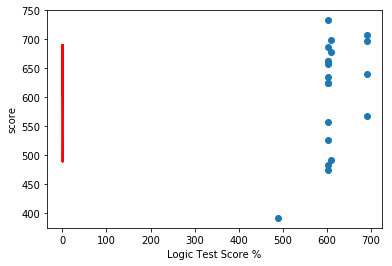

In [51]:
#regressor/predictions for test data
X1 = np.array(X_matric_test)
predictor1 = lm_matric.predict(X1)


#plotting the test data
plt.scatter(lm_matric.predict(X1), y_matric_test[:,None])

#plot the regression line
plt.plot(X_matric_test[:X_matric_test.shape[0]],predictor1, color = 'red')

#label the axis
plt.xlabel('Logic Test Score %')
plt.ylabel('score')

C:\ANACONDA\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


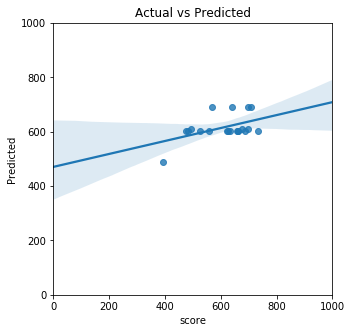

In [52]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 1000)
ax.set_ylim(0, 1000)

sns.regplot(x = y_matric_test, y = predictor1)

# PLOTTING THE PAST PERFORMANCE MODEL

Text(0, 0.5, 'score')

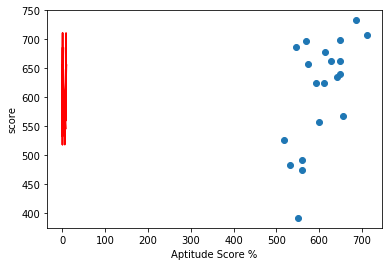

In [53]:
#regressor/predictions for test data
X2 = np.array(X_past_test)
predictor_past = lm_past.predict(X2)


#plotting the test data
plt.scatter(lm_past.predict(X2), y_past_test)

#plot the regression line
plt.plot(X_past_test,predictor_past, color = 'red')

#label the axis
plt.xlabel('Aptitude Score %')
plt.ylabel('score')

C:\ANACONDA\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


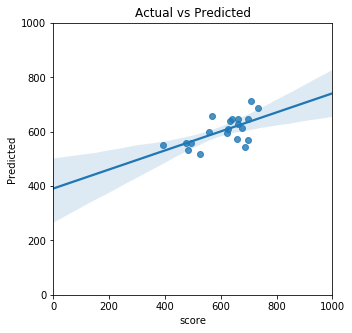

In [54]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 1000)
ax.set_ylim(0, 1000)

sns.regplot(x = y_past_test, y = predictor_past)

# PLOTTING INFO MODEL

Text(0, 0.5, 'score')

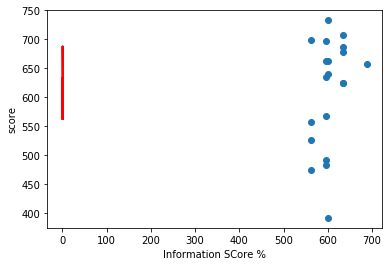

In [55]:
### regressor/predictions for test data
X3 = np.array(X_info_test)
predictor3 = lm_info.predict(X3)


#plotting the test data
plt.scatter(lm_info.predict(X3), y_info_test)

#plot the regression line
plt.plot(X_info_test,predictor3, color = 'red')

#label the axis
plt.xlabel('Information SCore %')
plt.ylabel('score')

C:\ANACONDA\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


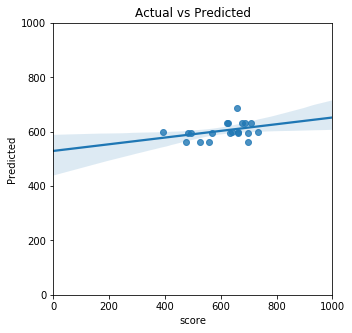

In [56]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 1000)
ax.set_ylim(0, 1000)

sns.regplot(x = y_info_test, y = predictor3)

# PLOTTING ALL FEATURES MODEL


Text(0, 0.5, 'score')

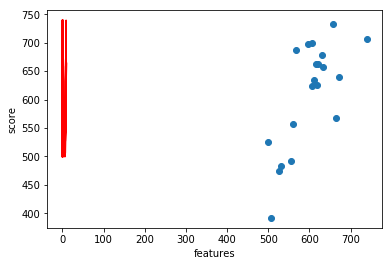

In [57]:
#PLOTTING THE MODEL
X_all = np.array(X_test_all)
predictor_all = lm_all.predict(X_all)
#plotting the test data
plt.scatter(lm_all.predict(X_all), y_test)

#Plot the regression line

plt.plot(X_all,predictor_all, color = 'red')
#label axis
plt.xlabel('features')
plt.ylabel('score')


In [58]:
predictor_all

array([597.3941097 , 567.06744177, 526.86732114, 615.19945414,
       554.31779902, 658.49751144, 610.86751916, 559.18280505,
       605.14532284, 531.12038148, 663.51507745, 671.58030918,
       632.21473927, 499.39142352, 621.41623408, 607.21181577,
       505.77991379, 631.25096086, 739.41159577, 619.47353393])

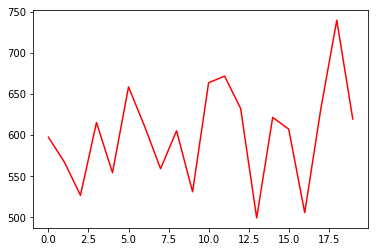

In [59]:
plt.plot(predictor_all, data = X_test_all, color = 'red')

C:\ANACONDA\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


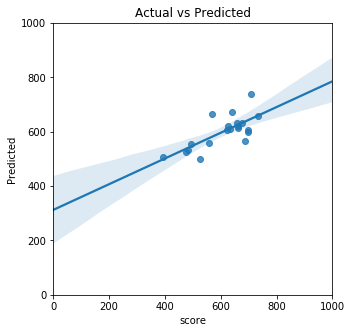

In [60]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 1000)
ax.set_ylim(0, 1000)

sns.regplot(x = y_test, y = predictor_all)

In [61]:
y_test,predictor_all

(id
 83    697
 75    687
 27    474
 30    662
 44    492
 94    733
 36    635
 45    557
 23    624
 63    483
 6     567
 33    640
 12    658
 82    526
 29    663
 93    699
 37    392
 76    678
 85    707
 84    625
 Name: score, dtype: int64,
 array([597.3941097 , 567.06744177, 526.86732114, 615.19945414,
        554.31779902, 658.49751144, 610.86751916, 559.18280505,
        605.14532284, 531.12038148, 663.51507745, 671.58030918,
        632.21473927, 499.39142352, 621.41623408, 607.21181577,
        505.77991379, 631.25096086, 739.41159577, 619.47353393]))

In [62]:
y_testy_test.shape[0]

NameError: name 'y_testy_test' is not defined

In [ ]:
(y_test, predictions_all, predictor1, predictor2, predictor3)

In [ ]:
pd.merge(pd.DataFrame(y_test),pd.DataFrame(predictions_all)

In [ ]:
pd.DataFrame(predictions_all)

In [ ]:
df1 = pd.merge(pd.DataFrame(predictor1),pd.DataFrame(predictor2),left_index=True,right_index=True)
df1.rename(columns = {'0_x':'predictions_matric','0_y':'predictions_past'},inplace = True)
df1.head()

In [ ]:
df2 =pd.merge(pd.DataFrame(predictions_all),pd.DataFrame(predictor3), left_index = True, right_index = True)
df2.rename(columns = {'0_x':'predictions_all', '0_y':'predictions_info'},inplace = True)
df2.head()

In [ ]:
predictions = pd.merge(df1, df2, left_index= True, right_index = True)
predictions.to_csv('Predictions.csv')

In [ ]:
score = pd.DataFrame(y_test)
score.to_csv('score.csv')

# MSE TRAIN TABLE

In [ ]:
# Calculate MSE
full_mse  = metrics.mean_squared_error(y_train, lm_all.predict(X_train_all))
matric_mse    = metrics.mean_squared_error(y_matric_train, lm_matric.predict(X_matric_train))
past_mse = metrics.mean_squared_error(y_past_train, lm_matric.predict(X_past_train))
info_mse  = metrics.mean_squared_error(y_info_train, lm_info.predict(X_info_train))

# Create list of MSE's
mse_train  = [full_mse, matric_mse, matric_mse, info_mse]

# Turn list into Dataframe
a = pd.DataFrame(mse_train,
             index   = ['Full', 'Matric Results', 'Past Performance', 'Info'],
             columns = ['MSE Train'])

In [ ]:
a.to_csv('MSE TRAIN TABLE.csv')

# MSE TEST TABLE

In [ ]:
# Calculate MSE
full_mse  = metrics.mean_squared_error(y_test, predictions_all)
matric_mse    = metrics.mean_squared_error(y_test, predictor1)
past_mse = metrics.mean_squared_error(y_test, predictor2)
info_mse  = metrics.mean_squared_error(y_test, predictor3)

# Create list of MSE's
mse_test  = [full_mse, matric_mse, past_mse, info_mse]

# Turn list into Dataframe
b = pd.DataFrame(mse_test,
             index   = ['Full', 'Matric Results', 'Past Performance', 'Info'],
             columns = ['MSE Test'])

In [ ]:
b.to_csv('MSE TEST TABLE.csv')

# R TRAIN TABLE

In [ ]:
full_r2  = lm_all.score(X_train_all, y_train)
matric_r2    = lm_matric.score(X_matric_train, y_train)
past_r2 = lm_past.score(X_past_train, y_train)
info_r2  = lm_info.score(X_info_train, y_train)

r2_train  = [full_r2, matric_r2, past_r2, info_r2]

c = pd.DataFrame(r2_train,index   = ['Full', 'Matric Results', 'Past Performance', 'Info'],columns = ['R Squared Train'] )

In [ ]:
c.to_csv('R TRAIN TABLE.csv')

# R TEST TABLE

In [ ]:

full_r2  = lm_all.score(X_test_all, y_test)
matric_r2    = lm_matric.score(X_matric_test, y_test)
past_r2 = lm_past.score(X_past_test, y_test)
info_r2  = lm_info.score(X_info_test, y_test)

r2_test  = [full_r2, matric_r2, past_r2, info_r2]

d = pd.DataFrame(r2_test,index   = ['Full', 'Matric Results', 'Past Performance', 'Info'],columns = ['R Squared Test'] )

In [ ]:
lm_all.score(X_test_all, y_test)

In [ ]:
d.to_csv('R TEST TABLE.csv')

In [ ]:
df[['Logic Test Score %', 'Aptitude Score', 'Interview Score', 'Science_A','Maths_A', 'Maths_F', 'qualification_Matriculant','qualification_Post Graduate', 'programming_None']]

In [ ]:
lm_all